In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [64]:
boxs = np.array([[12, 84, 140, 212, 0.1],
                 [24, 84, 152, 212, 0.2],
                 [36, 84, 164, 212, 0.5],
                 [12, 96, 140, 224, 0.1],
                 [24, 96, 152, 224, 0.3],
                 [24, 108, 152, 236, 0.8]])

In [65]:
black_img = np.zeros((255, 255))

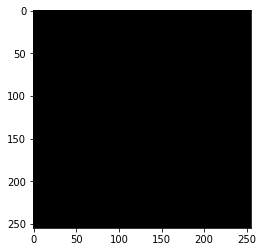

In [66]:
plt.imshow(black_img, cmap='gray')

In [67]:
print(cv2.rectangle.__doc__)

rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a simple, thick, or filled up-right rectangle.
.   
.   The function rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
.   are pt1 and pt2.
.   
.   @param img Image.
.   @param pt1 Vertex of the rectangle.
.   @param pt2 Vertex of the rectangle opposite to pt1 .
.   @param color Rectangle color or brightness (grayscale image).
.   @param thickness Thickness of lines that make up the rectangle. Negative values, like CV_FILLED ,
.   mean that the function has to draw a filled rectangle.
.   @param lineType Type of the line. See the line description.
.   @param shift Number of fractional bits in the point coordinates.


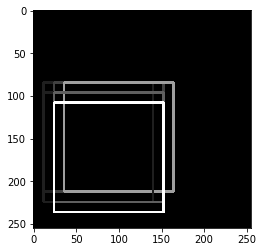

In [73]:
rect_img = black_img.copy()
for box in boxs:
    (x1, y1, x2, y2), s = map(int, box[:4]), float(box[4])
    cv2.rectangle(rect_img, (x1, y1), (x2, y2), int(s*255), 2)
plt.imshow(rect_img, cmap="gray")

In [74]:
def overlap(box1, box2):
    w = max(0, box1[2]-box2[0])
    h = max(0, box1[3]-box2[1])
    return w*h

In [75]:
def non_max_suppress(boxes, thres=0.3):
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    score = boxes[:, 4]
    area = (x2-x1+1)*(y2-y1+1)
    
    idx = np.argsort(-score)
    max_idx = idx[0]
    max_box = boxes[max_idx]
    max_area = area[max_idx]
    pick = [max_idx]
    for i in idx[1:]:
        cur_box = boxes[i]
        if overlap(max_box, cur_box) <= thres:
            pick.append(i)
    return pick

In [76]:
pick_idx = non_max_suppress(boxs)

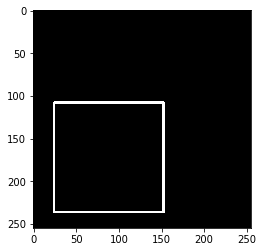

In [77]:
pick_rects = black_img.copy()
for i in pick_idx:
    x1, y1, x2, y2, _ = map(int, boxs[i])
    cv2.rectangle(pick_rects, (x1, y1), (x2, y2), 128, 2)
plt.imshow(pick_rects, cmap="gray")